In [1]:
import pandas as pd
import numpy as np
import random as rd
import scipy.stats as stats
import seaborn as sns

# DATA CLEANING


## Creating a dataset

In [2]:
df = pd.DataFrame({'A': [1, 2, np.nan, 4], 'B': [5, np.nan, np.nan, 8], 'C': [9, 10, 11, 12]})
df.iloc[1:3, 1:3] = np.nan
print(df)

     A    B     C
0  1.0  5.0   9.0
1  2.0  NaN   NaN
2  NaN  NaN   NaN
3  4.0  8.0  12.0


In [3]:
df.to_csv('Z:/DWDM/DataPreprocessing/your_dataset.csv', index=False)

OSError: Cannot save file into a non-existent directory: 'Z:\DWDM\DataPreprocessing'

In [ ]:
df = pd.read_csv('Z:/DWDM/DataPreprocessing/your_dataset.csv')

## Identification of null values

In [8]:
missing_values = df.isnull().sum()
print(missing_values)

A    1
B    2
C    2
dtype: int64


## Visualization of missing Data

<AxesSubplot:>

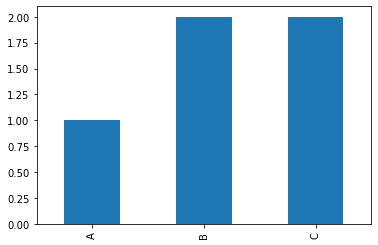

In [9]:
missing_values.plot(kind='bar')

In [10]:
print(df)

     A    B     C
0  1.0  5.0   9.0
1  2.0  NaN   NaN
2  NaN  NaN   NaN
3  4.0  8.0  12.0


## Filling the missing data

### MEAN

In [11]:
df_mean = pd.read_csv('Z:/DWDM/DataPreprocessing/your_dataset.csv')
df_mean.fillna(df_mean.mean(), inplace=True)
print(df_mean)

          A    B     C
0  1.000000  5.0   9.0
1  2.000000  6.5  10.5
2  2.333333  6.5  10.5
3  4.000000  8.0  12.0


### MEDIAN

In [13]:
df_median = pd.read_csv('Z:/DWDM/DataPreprocessing/your_dataset.csv')
df_median.fillna(df_median.median(), inplace=True)
print(df_median)

     A    B     C
0  1.0  5.0   9.0
1  2.0  6.5  10.5
2  2.0  6.5  10.5
3  4.0  8.0  12.0


### STD DEV

In [14]:
df_std = pd.read_csv('Z:/DWDM/DataPreprocessing/your_dataset.csv')
df_std.fillna(df_std.std(), inplace=True)
print(df_std)

          A        B         C
0  1.000000  5.00000   9.00000
1  2.000000  2.12132   2.12132
2  1.527525  2.12132   2.12132
3  4.000000  8.00000  12.00000


### VARIANCE

In [16]:
df_var = pd.read_csv('Z:/DWDM/DataPreprocessing/your_dataset.csv')
df_var.fillna(df_var.var(), inplace=True)
print(df_var)

          A    B     C
0  1.000000  5.0   9.0
1  2.000000  4.5   4.5
2  2.333333  4.5   4.5
3  4.000000  8.0  12.0


# DATA INTEGRATION

## X^2 Test

In [18]:
np.random.seed(10)

type_bottle = np.random.choice(a= ["paper","cans","glass","others","plastic"],
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)
 

month = np.random.choice(a= ["January","February","March"],
                              p = [0.4, 0.2, 0.4],
                              size=1000)
 
bottles = pd.DataFrame({"types":type_bottle,"months":month})

bottles

,types,months
0,plastic,January
1,paper,March
2,plastic,February
3,plastic,March
4,others,January
...,...,...
995,plastic,March
996,glass,February
997,cans,February
998,plastic,March


In [19]:
bottles_tab = pd.crosstab(bottles.types, bottles.months, margins = True)
 
bottles_tab.columns = ["January","February","March","row_totals"]
 
bottles_tab.index = ["paper","cans","glass","others","plastic","col_totals"]
 
observed = bottles_tab.iloc[0:5,0:3]

bottles_tab

,January,February,March,row_totals
paper,25,65,64,154
cans,50,107,94,251
glass,8,15,15,38
others,7,21,32,60
plastic,96,189,212,497
col_totals,186,397,417,1000


In [20]:
expected =  np.outer(bottles_tab["row_totals"][0:5],bottles_tab.loc["col_totals"][0:3]) / 1000
 
expected = pd.DataFrame(expected)
 
expected.columns = ["Janurary","Feburary","March"]
expected.index = ["paper","cans","glass","others","plastic"]
 
expected

,Janurary,Feburary,March
paper,28.644,61.138,64.218
cans,46.686,99.647,104.667
glass,7.068,15.086,15.846
others,11.160,23.820,25.020
plastic,92.442,197.309,207.249


In [21]:
chi_squared_val = (((observed-expected)**2)/expected).sum().sum()
print(chi_squared_val)

3.1891910015593856


In [22]:
alpha= float(input("Enter the alpha value: "))

Enter the alpha value: 10


In [23]:
if(chi_squared_val>alpha):
        print("Rejecting the Hypothesis.")
        print("So, the two attributes are dependent.")
else:
        print("Accepting the Hypothesis.")
        print("So, the two attributes are independent.")

Accepting the Hypothesis.
So, the two attributes are independent.


## Covariance and Correlation

In [24]:
def covariance(x, y):
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov

In [25]:
def correlation(x, y):
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    sub_x = [i-mean_x for i in x]
    sub_y = [i-mean_y for i in y]
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    std_deviation_x = sum([sub_x[i]**2.0 for i in range(len(sub_x))])
    std_deviation_y = sum([sub_y[i]**2.0 for i in range(len(sub_y))])
    denominator = (std_deviation_x*std_deviation_y)**0.5
    cor = numerator/denominator
    return cor

In [72]:
df = pd.read_csv('Z:/DWDM/DataSets/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [74]:
Salary_cov=covariance(df['YearsExperience'],df['Salary'])
print("Covariance between the two attributes is:",Salary_cov)

Covariance between the two attributes is: 76106.30344827585


In [75]:
Salary_corr=correlation(df['YearsExperience'],df['Salary'])
print("Covariance between the two attributes is:",Salary_c)

Covariance between the two attributes is: 0.9782416184887598


# DATA REDUCTION

## Feature Subset Selection

In [85]:
import matplotlib.pyplot as plt
df = pd.read_csv('Z:/DWDM/DataPreprocessing/your_dataset.csv')

print(df.head())
#Corelation
corr = df.corr()
#Covariance
cov = df.cov()
#FSS
subset = cov.nlargest(2, 'A')['A'].index

print(subset)

     A    B     C
0  1.0  5.0   9.0
1  2.0  NaN   NaN
2  NaN  NaN   NaN
3  4.0  8.0  12.0
Index(['B', 'C'], dtype='object')


# DATA NORMALIZATION

## > MinMax Normalization

In [ ]:
def normalize(self , data ) :
shape = data.shape
data = np.reshape( data , (-1 , ) )

MaxValue = np.max( data )
MinValue = np.min( data )

normalized_values = list()
for AttributeValue in the given data:
AttributeValue_normalized = (AttributeValue – MinValue ) / ( MaxValue – MinValue )
normalized_values.append( AttributeValue_normalized )
n_array = np.array( normalized_values )

return np.reshape( n_array , shape )

In [55]:
df = pd.read_csv('Z:/DWDM/DataSets/Salary_Data.csv')

min_value = df['Salary'].min()
max_value = df['Salary'].max()

df['normalized_value'] = ((1000 - 100) * (df['Salary'] - min_value) / (max_value - min_value)) + 100
print("    Normalized data(100-1000)")
print(df['normalized_value'])

    Normalized data(100-1000)
0      117.136782
1      190.085046
2      100.000000
3      161.594614
4      122.962438
5      301.038271
6      338.330971
7      277.682495
8      383.990078
9      306.853296
10     370.946137
11     292.023388
12     304.386960
13     305.705174
14     348.547130
15     421.123317
16     400.829199
17     582.179305
18     563.841247
19     697.544295
20     674.135365
21     743.607371
22     775.807938
23     908.798724
24     862.225372
25     821.307583
26     942.360028
27     896.286322
28    1000.000000
29     994.482636
Name: normalized_value, dtype: float64


## > Z-Score Normalization

In [64]:
df = pd.read_csv('Z:/DWDM/DataSets/Salary_Data.csv')
print(df['Salary'])
mean = sum(df['Salary']) / len(df['Salary'])
differences = [(value - mean)**2 for value in df['Salary']]
sum_of_differences = sum(differences)
standard_deviation = (sum_of_differences / (len(df['Salary']) - 1)) ** 0.5

print("Standard Deviation: ",standard_deviation)

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64
Standard Deviation:  27414.4297845823


In [62]:
zscores = [(df['Salary'] - mean) / standard_deviation]

print(zscores)

[0    -1.337252
1    -1.086946
2    -1.396053
3    -1.184705
4    -1.317262
5    -0.706234
6    -0.578272
7    -0.786374
8    -0.421603
9    -0.686281
10   -0.466360
11   -0.737167
12   -0.694744
13   -0.690220
14   -0.543218
15   -0.294188
16   -0.363823
17    0.258441
18    0.195517
19    0.654290
20    0.573968
21    0.812346
22    0.922835
23    1.379164
24    1.219358
25    1.078957
26    1.494323
27    1.336231
28    1.692102
29    1.673170
Name: Salary, dtype: float64]


## > Decimal Normalization

In [65]:
df=pd.read_csv('Z:/DWDM/DataSets/Salary_Data.csv')
print(df['Salary'])

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64


In [71]:
max_b = str(int(df["Salary"].max()))
df["decimal_scaling"] = df["Salary"]/(10**len(max_b))
print(df["decimal_scaling"],sep=" ")

0     0.039343
1     0.046205
2     0.037731
3     0.043525
4     0.039891
5     0.056642
6     0.060150
7     0.054445
8     0.064445
9     0.057189
10    0.063218
11    0.055794
12    0.056957
13    0.057081
14    0.061111
15    0.067938
16    0.066029
17    0.083088
18    0.081363
19    0.093940
20    0.091738
21    0.098273
22    0.101302
23    0.113812
24    0.109431
25    0.105582
26    0.116969
27    0.112635
28    0.122391
29    0.121872
Name: decimal_scaling, dtype: float64


## Linear Regression

In [28]:
data_set= pd.read_csv('Z:/DWDM/DataSets/Salary_Data.csv')
print(data_set)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [46]:
x= data_set.iloc[:, :-1].values  
y= data_set.iloc[:, 1].values   

In [47]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)  

In [4]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  

NameError: name 'x_train' is not defined

In [49]:
y_pred= regressor.predict(x_test)  
x_pred= regressor.predict(x_train)  

### Training DataSet

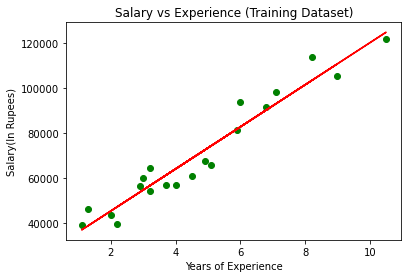

In [50]:
plt.scatter(x_train, y_train, color="green")   
plt.plot(x_train, x_pred, color="red")    
plt.title("Salary vs Experience (Training Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show()   

### Test DataSet

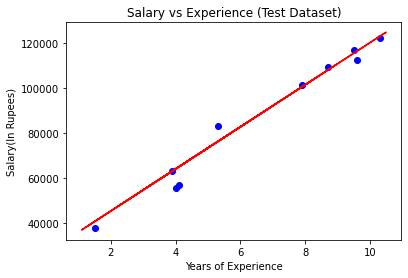

In [39]:
plt.scatter(x_test, y_test, color="blue")   
plt.plot(x_train, x_pred, color="red")    
plt.title("Salary vs Experience (Test Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show()  